In [1]:
import pandas as pd
data=pd.read_csv('concrete (1).csv')

In [2]:
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [5]:
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


we can see no null values. We can also observe various central measures here.

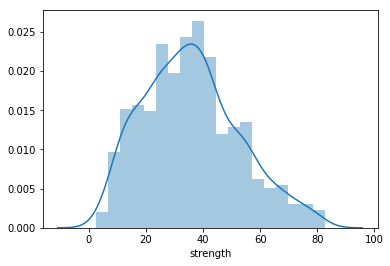

In [7]:
import seaborn
seaborn.distplot(data['strength'])

Here we can see the strength output columns is almost normally distributed.

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

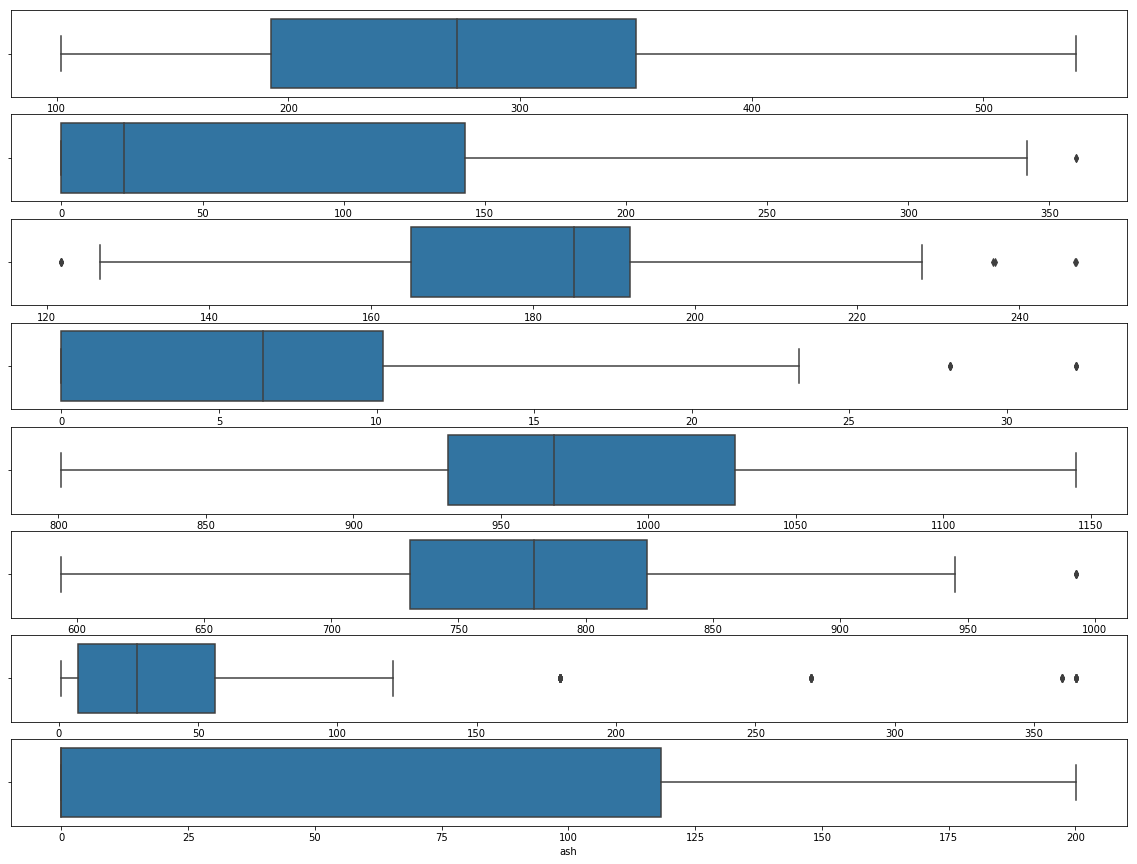

In [9]:
plt.figure(figsize= (20,15))
plt.subplot(8,1,1)
sns.boxplot(data['cement'])

plt.subplot(8,1,2)
sns.boxplot(data['slag'])

plt.subplot(8,1,3)
sns.boxplot(data['water'])
plt.subplot(8,1,4)
sns.boxplot(data['superplastic'])
plt.subplot(8,1,5)
sns.boxplot(data['coarseagg'])

plt.subplot(8,1,6)
sns.boxplot(data['fineagg'])

plt.subplot(8,1,7)
sns.boxplot(data['age'])

plt.subplot(8,1,8)
sns.boxplot(data['ash'])

plt.show()

We can see few outlier for some columns which we need to fix

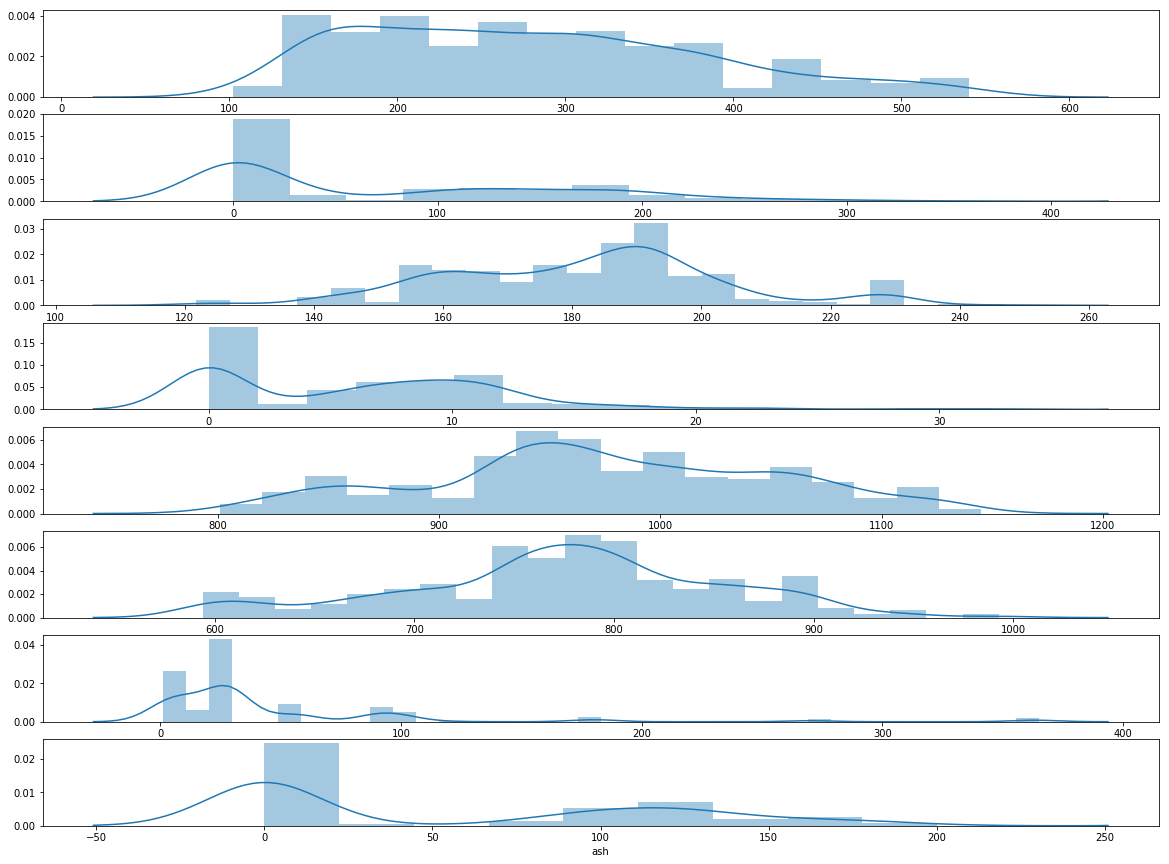

In [10]:
plt.figure(figsize= (20,15))
plt.subplot(8,1,1)
sns.distplot(data['cement'])

plt.subplot(8,1,2)
sns.distplot(data['slag'])

plt.subplot(8,1,3)
sns.distplot(data['water'])
plt.subplot(8,1,4)
sns.distplot(data['superplastic'])
plt.subplot(8,1,5)
sns.distplot(data['coarseagg'])

plt.subplot(8,1,6)
sns.distplot(data['fineagg'])

plt.subplot(8,1,7)
sns.distplot(data['age'])

plt.subplot(8,1,8)
sns.distplot(data['ash'])

plt.show()

By observing the distribution plots we can see that there are two peaks which indicates presence of 2 gaussians. So we might need to fix that by making 2 different models for the 2 different gaussian clusters. And also ash columns seems very sparse.

In [11]:
import numpy as np
def fixOutliers(dataframe):
    for cols in dataframe.columns:
        q1= np.percentile(dataframe[cols], 25) 
        q3= np.percentile(dataframe[cols], 75)  
        IQR=q3-q1
        lower_bound = q1 -(1.5 * IQR) 
        upper_bound = q3 +(1.5 * IQR) 
        dataframe.loc[dataframe[cols] < lower_bound, [cols]] = lower_bound
        dataframe.loc[dataframe[cols] > upper_bound, [cols]] = upper_bound

In [12]:
data_fixed=data.copy()

In [13]:
fixOutliers(data_fixed)

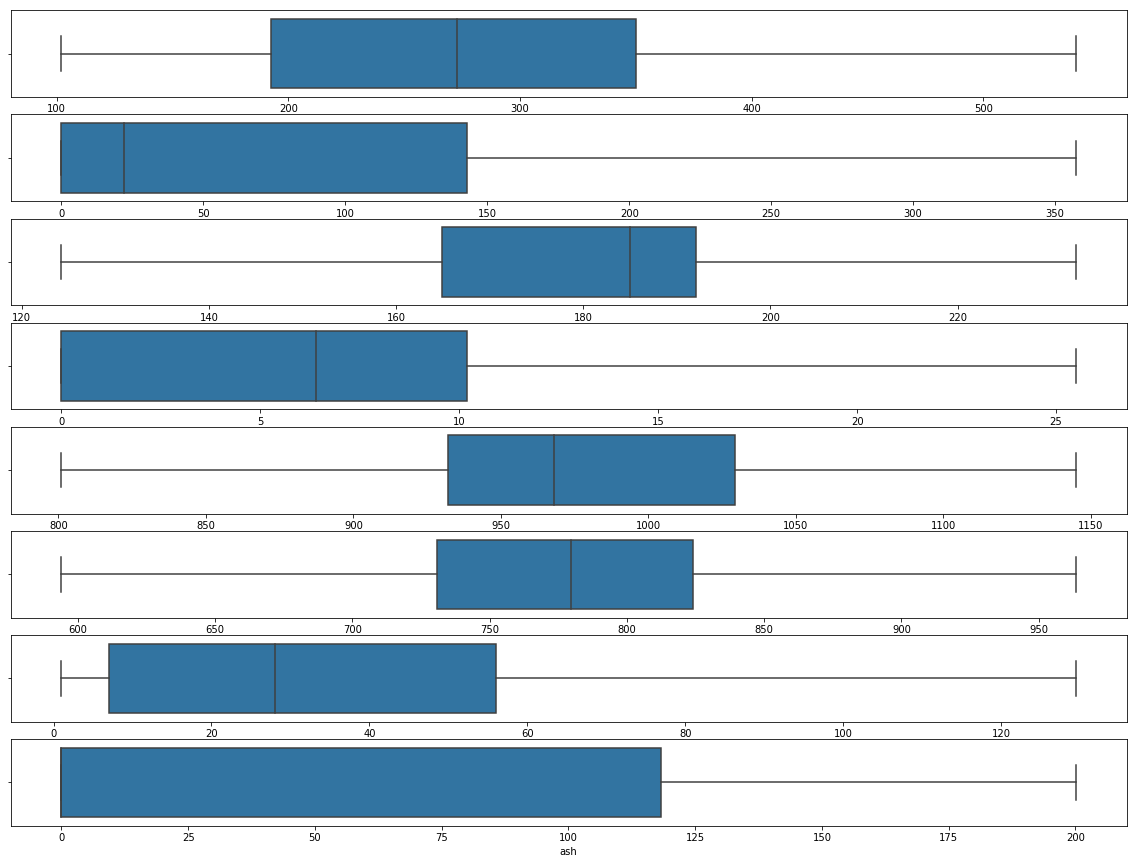

In [14]:
plt.figure(figsize= (20,15))
plt.subplot(8,1,1)
sns.boxplot(data_fixed['cement'])

plt.subplot(8,1,2)
sns.boxplot(data_fixed['slag'])

plt.subplot(8,1,3)
sns.boxplot(data_fixed['water'])
plt.subplot(8,1,4)
sns.boxplot(data_fixed['superplastic'])
plt.subplot(8,1,5)
sns.boxplot(data_fixed['coarseagg'])

plt.subplot(8,1,6)
sns.boxplot(data_fixed['fineagg'])

plt.subplot(8,1,7)
sns.boxplot(data_fixed['age'])

plt.subplot(8,1,8)
sns.boxplot(data_fixed['ash'])

plt.show()

There seems to be no missing values.

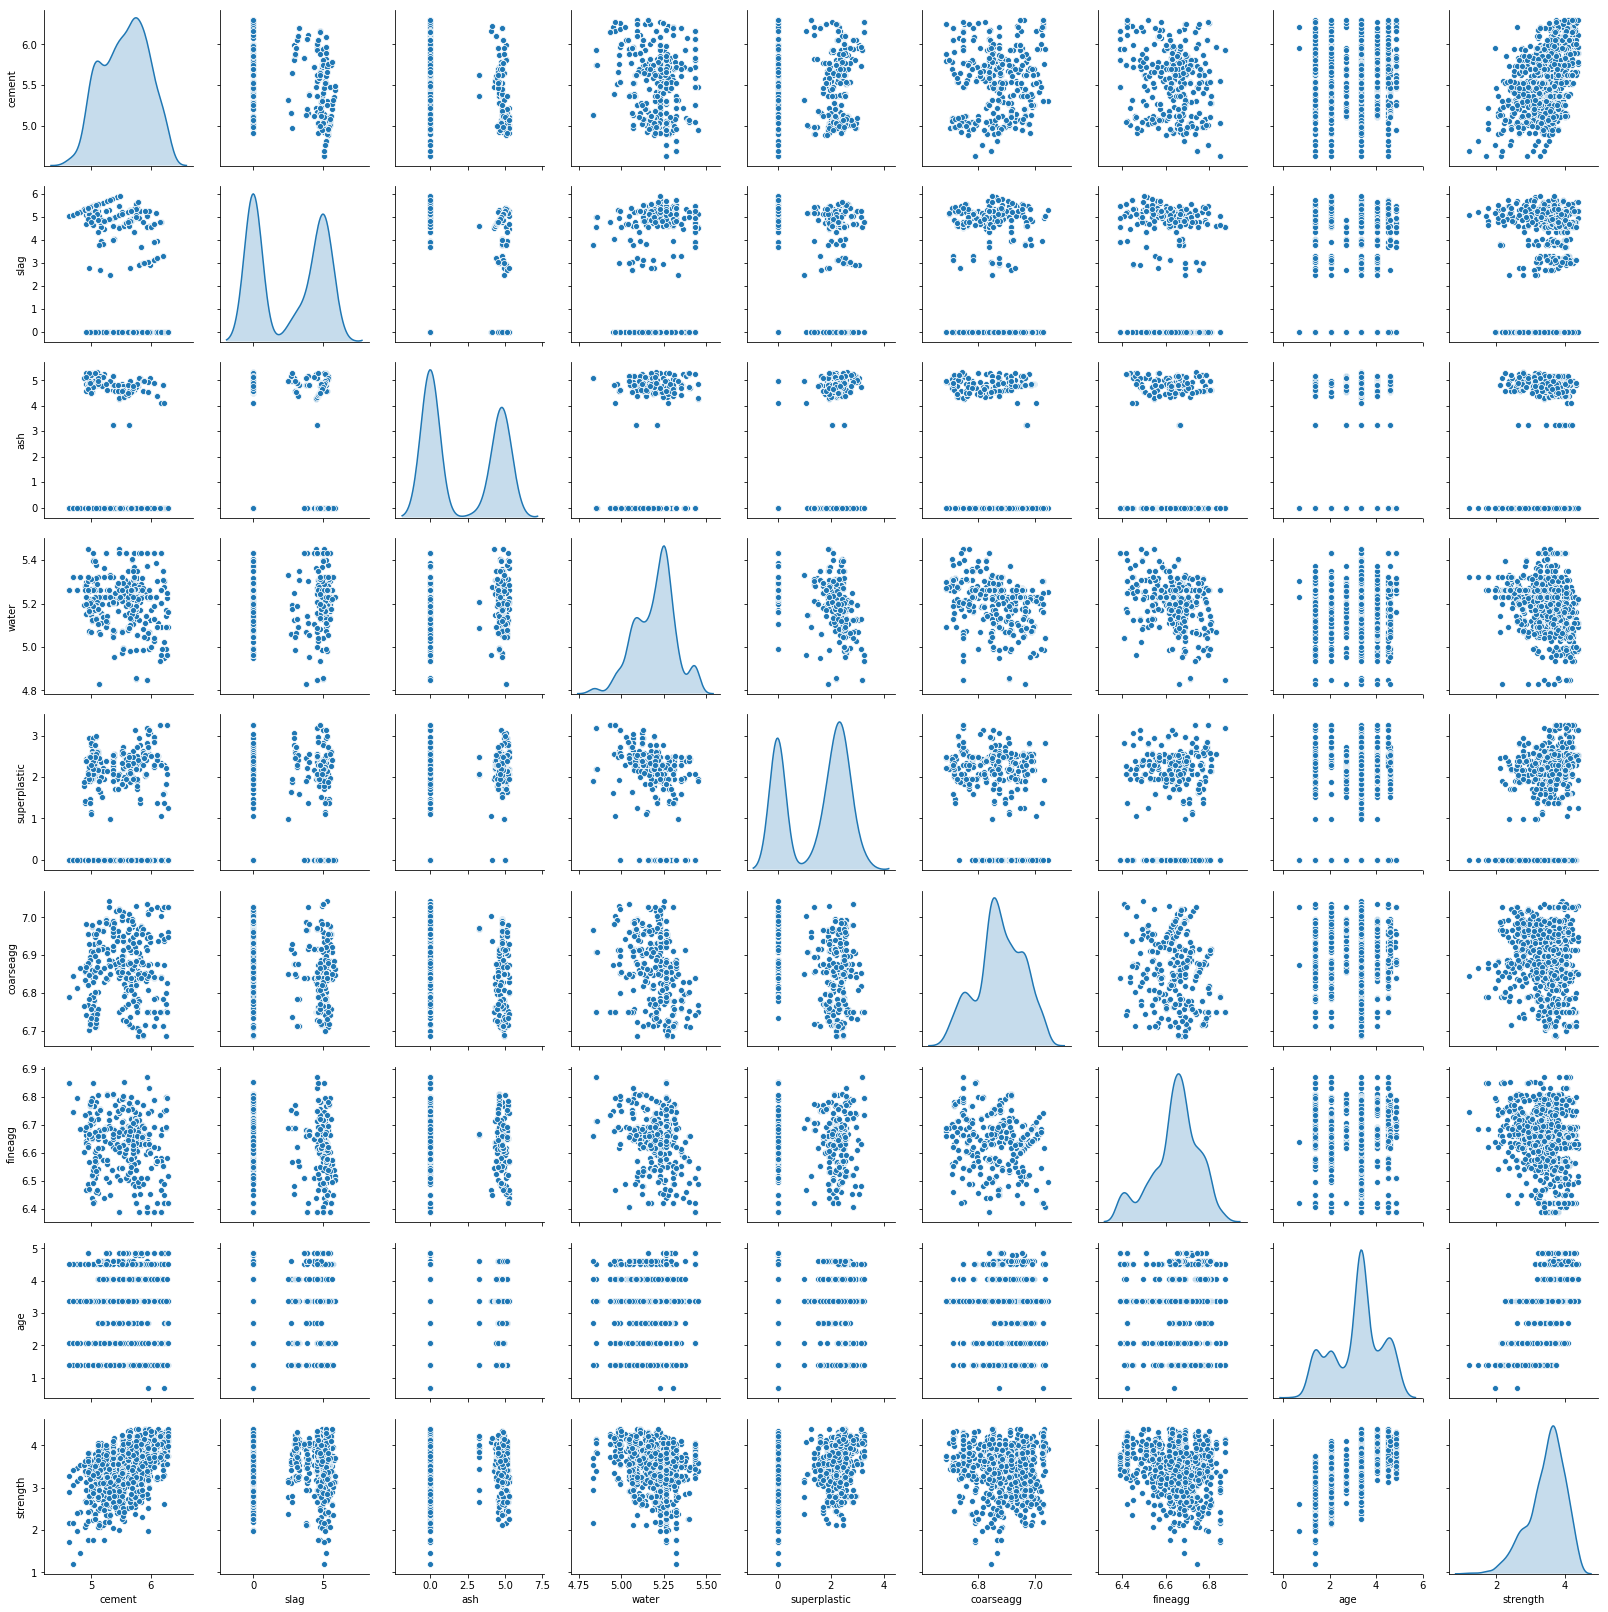

In [15]:
sns.pairplot(np.log1p(data_fixed),diag_kind='kde')

Here it can be seen cement and strenth are +ve correlated.
superplastic and strenth are +ve correlated.
More or less most of the features are independent of each other according to the pairplot as most of the scatter plots looks like a cloud.

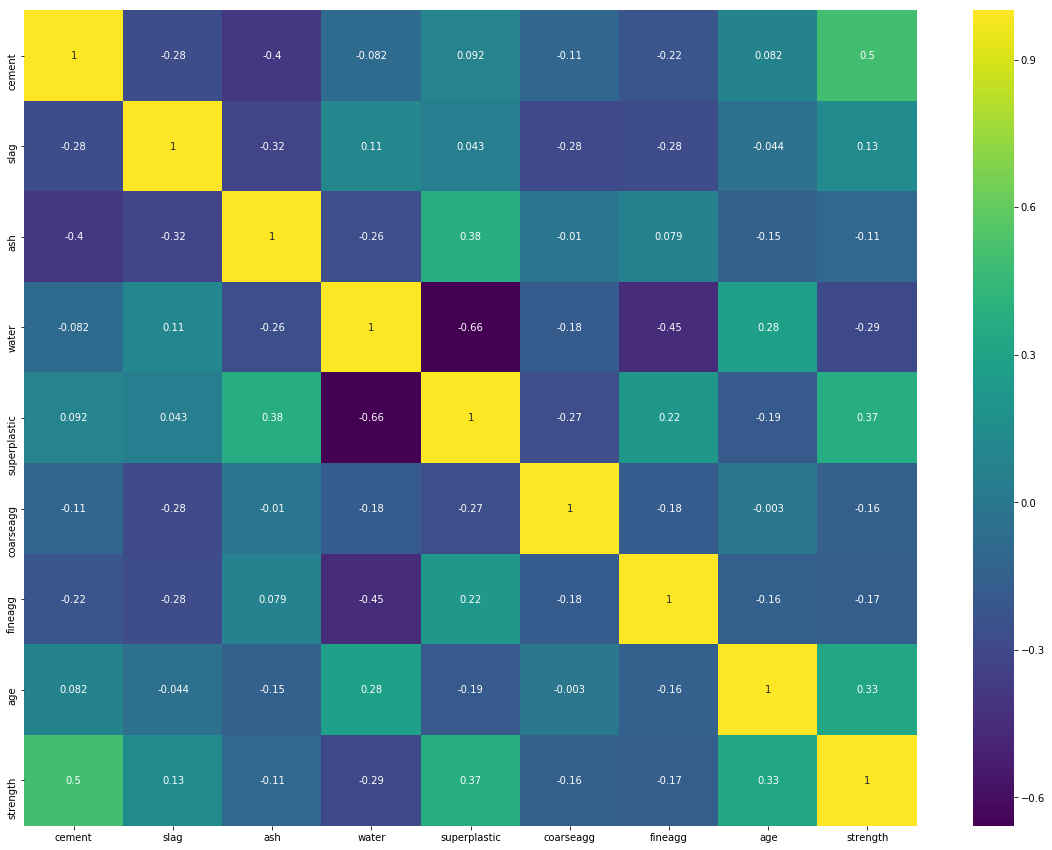

In [16]:
import matplotlib.pyplot as plt
corr = data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True,cmap="viridis")

Here we can see only significant +ve correlation between strength and cement and negative correlation between superplastic and water, finagg and water . 

Instead of using water and cement seperately we can combine them together to take the water-cement ratio. 

In [17]:
data_fixed['watercementratio']=data_fixed['water']/data_fixed['cement']

In [18]:
data_fixed.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,watercementratio
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89,1.440198
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51,0.937241
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22,0.749600
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85,0.857143
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29,1.248708


In [19]:
data_new=data_fixed.drop(columns=['cement','water'],axis=1)

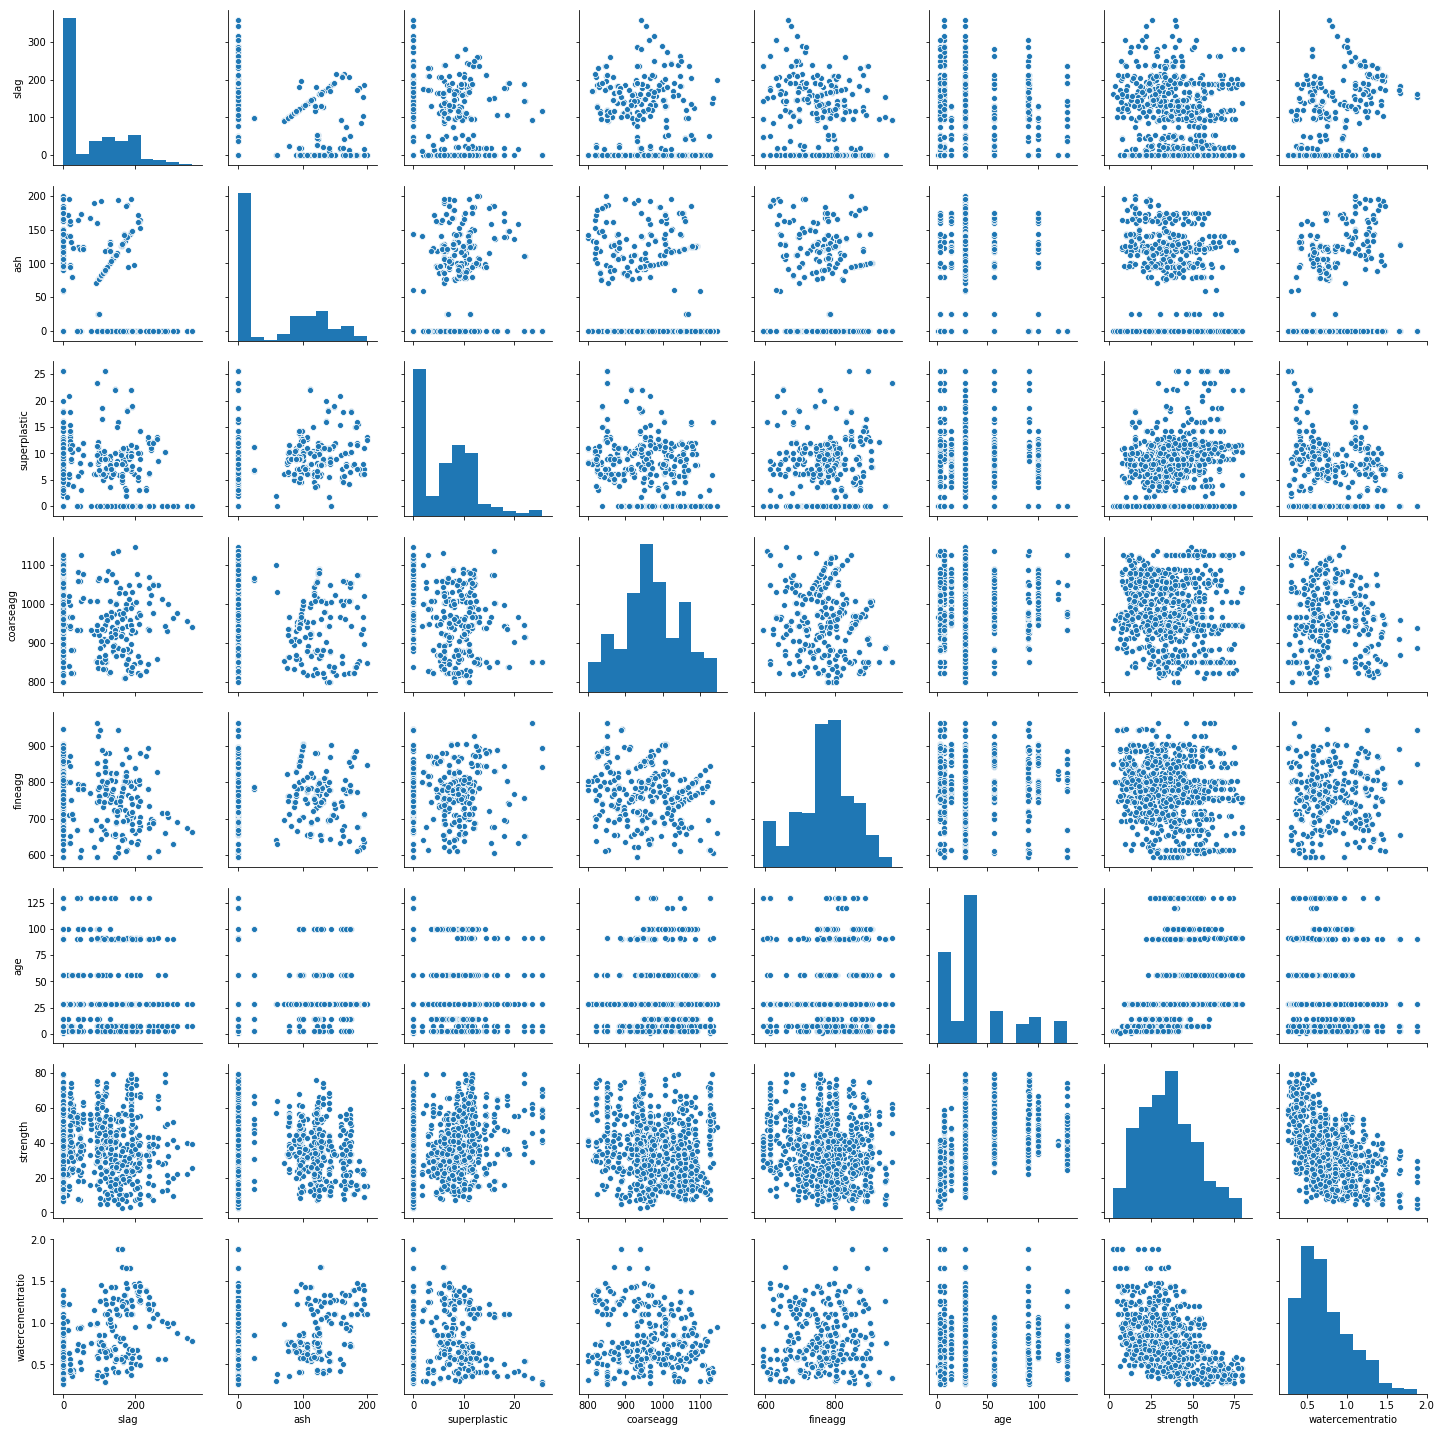

In [20]:
sns.pairplot(data_new)

In [21]:
from scipy.stats import zscore

In [24]:
data_X=np.log1p(data_new.drop(columns=['strength'],axis=1)).apply(zscore)
data_Y=data_new['strength']

In [23]:
data_X.head()

,slag,ash,superplastic,coarseagg,fineagg,age,watercementratio
0,1.164687,-0.900772,-1.261693,0.025685,-0.257237,0.156479,2.042527
1,0.502849,1.134113,0.880938,1.346122,0.325457,-0.478295,0.689804
2,-1.059326,1.024971,0.363275,-0.166222,1.065701,0.156479,0.092735
3,0.909004,-0.900772,-1.261693,-0.493688,-1.302104,0.156479,0.442335
4,1.104875,-0.900772,0.745888,0.956205,-0.933595,0.156479,1.563574


In [24]:
from sklearn.model_selection import train_test_split
test_size = 0.30 # taking 70:30 training and test set
data_train_X, data_test_X, data_train_Y, data_test_Y = train_test_split(data_X, data_Y, test_size=test_size)

In [25]:
data_train_X.head()

,slag,ash,superplastic,coarseagg,fineagg,age,watercementratio
92,0.530701,1.126309,0.664864,1.097706,0.140027,-0.478295,0.683520
944,0.863288,-0.900772,-1.261693,-1.094307,1.922704,0.156479,1.579695
87,-1.059326,1.044963,0.710808,0.477484,1.519070,-0.478295,0.092893
18,-1.059326,1.137795,0.626274,1.451410,0.417411,-1.750986,0.419833
772,-1.059326,1.124937,0.389584,1.076584,0.123097,-0.478295,0.419974


In [26]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr = gbr.fit(data_train_X, data_train_Y)

In [27]:
print(gbr.score(data_train_X,data_train_Y))
print(gbr.score(data_test_X,data_test_Y))

0.9480367529500916
0.9085558577634881


In [28]:
gbr.feature_importances_

array([0.09229878, 0.00763564, 0.05312058, 0.0124247 , 0.03344174,
       0.38593964, 0.41513892])

In [26]:
data_X_New=data_X.copy()

Now we try to split the data into clusters and work on them independently.

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

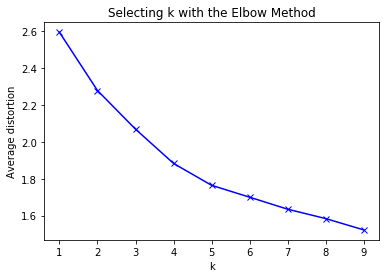

In [27]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(data_X_New)
    prediction=model.predict(data_X_New)
    meanDistortions.append(sum(np.min(cdist(data_X_New, model.cluster_centers_, 'euclidean'), axis=1)) / data_X_New.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

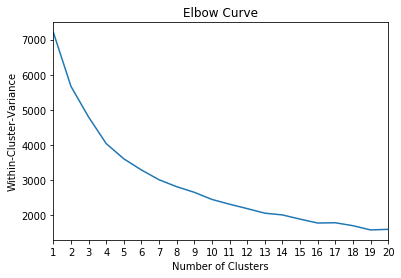

In [40]:
wss=[]
for k in range(1, 21):
    tsneSeg = KMeans(n_clusters=k, n_init=10)
    tsneSeg.fit(data_X_New)
    wss.append(tsneSeg.inertia_)
plt.plot(range(1, 21), wss)
plt.xlim(1,20)
plt.xticks(range(1, 21))
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster-Variance')
plt.title('Elbow Curve')
plt.show()

In [41]:
import math
class Point:
    def __init__(self, initx, inity):
        self.items_list = []
        self.x = initx
        self.y = inity
    def distance_to_line(self, p1, p2):
        x_diff = p2.x - p1.x
        y_diff = p2.y - p1.y
        num = abs(y_diff*self.x-x_diff*self.y + p2.x*p1.y-p2.y*p1.x)
        den = math.sqrt(y_diff**2 + x_diff**2)
        return num / den

Text(0.5, 1.0, 'Elbow')

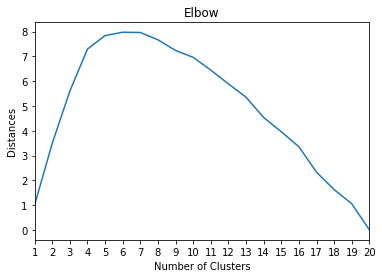

In [42]:
distances = []
for k in range(1, 21):
    p1 = Point(initx=1,inity=wss[0])
    p2 = Point(initx=21,inity=wss[19])
    p = Point(initx=k+1,inity=wss[k-1])
    distances.append(p.distance_to_line(p1,p2))
plt.plot(range(1, 21), distances)
plt.xlim(1,20)
plt.xticks(range(1, 21))
plt.xlabel('Number of Clusters')
plt.ylabel('Distances')
plt.title('Elbow')

In [43]:
opt_k = np.argmax(distances) + 1
print('Optimal Cluster Number =', opt_k)

Optimal Cluster Number = 6


In [44]:
distances

[0.9999936571693959,
 3.4874557356310327,
 5.596863220723333,
 7.296989755524688,
 7.841425509796175,
 7.975687717929492,
 7.965210144029625,
 7.671562800249691,
 7.240096873233627,
 6.963400499698867,
 6.447605277072079,
 5.894052376827161,
 5.355631733605861,
 4.535155094940942,
 3.9608947890142696,
 3.3571797961090475,
 2.3288962256462296,
 1.6267347829834513,
 1.05639368682125,
 7.693423737530378e-16]

There is a good elbow at n=2 

In [31]:
modelFinal=KMeans(2)
modelFinal.fit(data_X_New)
prediction=modelFinal.predict(data_X_New)

In [32]:
data_X_New["group"] = prediction

In [33]:
data_X_New.head()

,slag,ash,superplastic,coarseagg,fineagg,age,watercementratio,group
0,1.164687,-0.900772,-1.261693,0.025685,-0.257237,0.156479,2.042527,1
1,0.502849,1.134113,0.880938,1.346122,0.325457,-0.478295,0.689804,0
2,-1.059326,1.024971,0.363275,-0.166222,1.065701,0.156479,0.092735,0
3,0.909004,-0.900772,-1.261693,-0.493688,-1.302104,0.156479,0.442335,1
4,1.104875,-0.900772,0.745888,0.956205,-0.933595,0.156479,1.563574,1


In [34]:
data_X_New.describe()

,slag,ash,superplastic,coarseagg,fineagg,age,watercementratio,group
count,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1030.000000
mean,1.754799e-16,2.177331e-17,-7.329628e-17,1.795543e-15,-9.876889e-15,-6.467319e-18,-5.305357e-16,0.404854
std,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,0.491102
min,-1.059326e+00,-9.007716e-01,-1.261693e+00,-2.374778e+00,-2.437358e+00,-2.418403e+00,-1.799201e+00,0.000000
25%,-1.059326e+00,-9.007716e-01,-1.261693e+00,-4.936878e-01,-4.810139e-01,-1.083569e+00,-6.805380e-01,0.000000
50%,2.413642e-01,-9.007716e-01,4.758518e-01,-2.297687e-02,1.255174e-01,1.564795e-01,-1.614175e-01,0.000000
75%,1.002147e+00,1.113443e+00,8.356342e-01,7.408865e-01,6.491799e-01,8.071505e-01,6.835197e-01,1.000000
max,1.380517e+00,1.333398e+00,1.583295e+00,2.062908e+00,2.125332e+00,1.604725e+00,3.018488e+00,1.000000


In [35]:
data_X_New['Y']=data_Y

In [36]:
data_X_New.head()

,slag,ash,superplastic,coarseagg,fineagg,age,watercementratio,group,Y
0,1.164687,-0.900772,-1.261693,0.025685,-0.257237,0.156479,2.042527,1,29.89
1,0.502849,1.134113,0.880938,1.346122,0.325457,-0.478295,0.689804,0,23.51
2,-1.059326,1.024971,0.363275,-0.166222,1.065701,0.156479,0.092735,0,29.22
3,0.909004,-0.900772,-1.261693,-0.493688,-1.302104,0.156479,0.442335,1,45.85
4,1.104875,-0.900772,0.745888,0.956205,-0.933595,0.156479,1.563574,1,18.29


In [37]:
data_group1=data_X_New[data_X_New["group"]==0]
data_group2=data_X_New[data_X_New["group"]==1]

In [38]:
print(data_group1.info())
print(data_group2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 613 entries, 1 to 1027
Data columns (total 9 columns):
slag                613 non-null float64
ash                 613 non-null float64
superplastic        613 non-null float64
coarseagg           613 non-null float64
fineagg             613 non-null float64
age                 613 non-null float64
watercementratio    613 non-null float64
group               613 non-null int32
Y                   613 non-null float64
dtypes: float64(8), int32(1)
memory usage: 45.5 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 1029
Data columns (total 9 columns):
slag                417 non-null float64
ash                 417 non-null float64
superplastic        417 non-null float64
coarseagg           417 non-null float64
fineagg             417 non-null float64
age                 417 non-null float64
watercementratio    417 non-null float64
group               417 non-null int32
Y                   417 non-null float64


In [39]:
data_group_1=data_group1.drop(columns=['group'],axis=1)
data_group_2=data_group2.drop(columns=['group'],axis=1)

In [40]:
data_group_1.head()

,slag,ash,superplastic,coarseagg,fineagg,age,watercementratio,Y
1,0.502849,1.134113,0.880938,1.346122,0.325457,-0.478295,0.689804,23.51
2,-1.059326,1.024971,0.363275,-0.166222,1.065701,0.156479,0.092735,29.22
7,-1.059326,1.113443,0.475852,0.728814,-0.142017,0.807150,0.093409,36.64
9,1.106223,1.192708,0.737250,-1.206698,-0.902513,0.156479,1.571140,28.99
10,1.092778,1.179938,1.308063,-0.334796,-0.962064,0.156479,1.172150,36.35


In [41]:
data_group_1_Y=data_group_1['Y']
data_group_2_Y=data_group_2['Y']

In [42]:
data_group_1_X=data_group_1.drop(columns='Y',axis=1)
data_group_2_X=data_group_2.drop(columns='Y',axis=1)

In [43]:
data_group_1_X.head()

,slag,ash,superplastic,coarseagg,fineagg,age,watercementratio
1,0.502849,1.134113,0.880938,1.346122,0.325457,-0.478295,0.689804
2,-1.059326,1.024971,0.363275,-0.166222,1.065701,0.156479,0.092735
7,-1.059326,1.113443,0.475852,0.728814,-0.142017,0.807150,0.093409
9,1.106223,1.192708,0.737250,-1.206698,-0.902513,0.156479,1.571140
10,1.092778,1.179938,1.308063,-0.334796,-0.962064,0.156479,1.172150


In [44]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=7)
pca1.fit(data_group_1_X)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

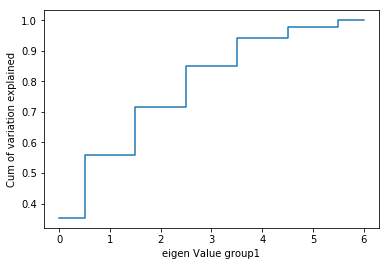

In [45]:
plt.step(list(range(0,7)),np.cumsum(pca1.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value group1')
plt.show()

In [46]:
np.cumsum(pca1.explained_variance_ratio_)<.95

array([ True,  True,  True,  True,  True, False, False])

Here optimal choice of n would be 5.

In [47]:
pca2 = PCA(n_components=7)
pca2.fit(data_group_2_X)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

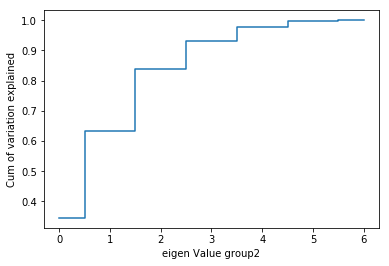

In [48]:
plt.step(list(range(0,7)),np.cumsum(pca2.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value group2')
plt.show()

In [49]:
np.cumsum(pca2.explained_variance_ratio_)<.95

array([ True,  True,  True,  True, False, False, False])

Optimal size should be 4

In [50]:
pcaFinal1 = PCA(n_components=5)
pcaFinal1.fit(data_group_1_X)
data_group_1_X_PCA = pcaFinal1.transform(data_group_1_X)

In [51]:
pcaFinal2 = PCA(n_components=4)
pcaFinal2.fit(data_group_2_X)
data_group_2_X_PCA = pcaFinal2.transform(data_group_2_X)

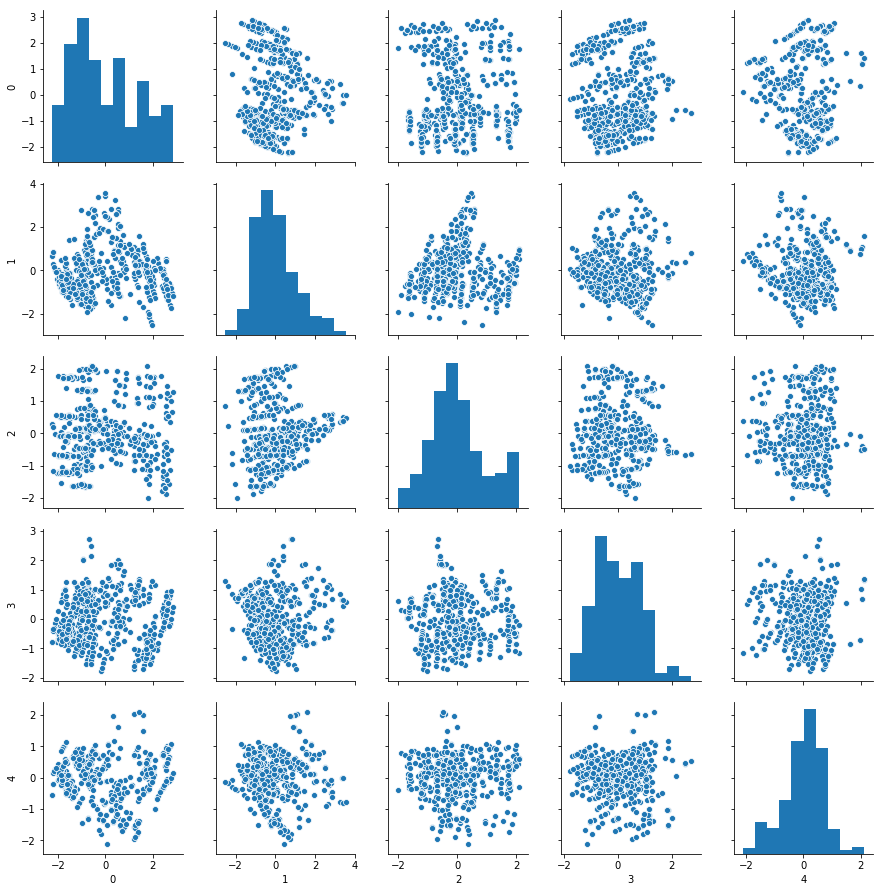

In [52]:
sns.pairplot(pd.DataFrame(data_group_1_X_PCA))

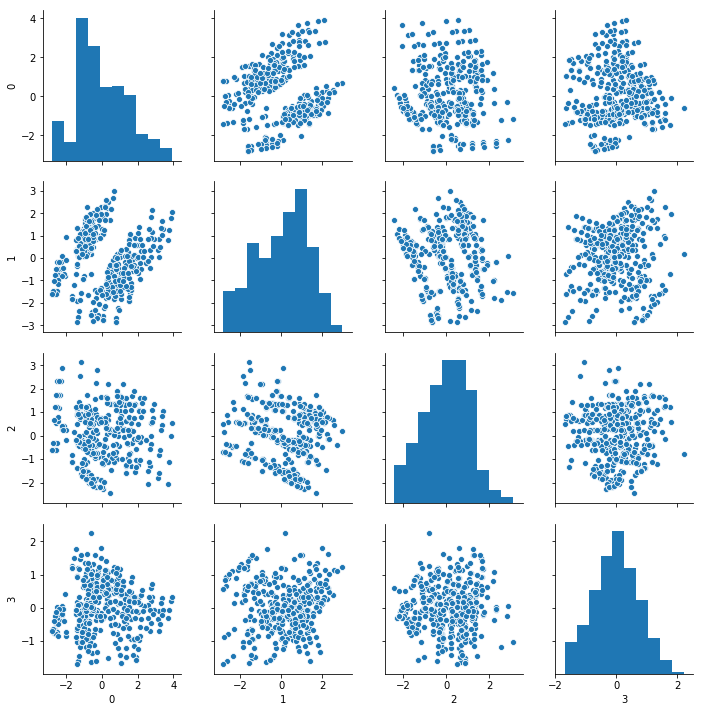

In [53]:
sns.pairplot(pd.DataFrame(data_group_2_X_PCA))

In [54]:
def calculateConfidence(accuracies):
    alpha = 0.95                             
    p = ((1.0-alpha)/2.0) * 100              
    lower = max(0.0, np.percentile(accuracies, p))  
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(accuracies, p))
    print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [64]:
def trainForEveryCluster(clusterX,clusterY,clusterNumber,model,param_gridd):
    trainX, testX, trainY, testY = train_test_split(clusterX, clusterY, test_size=0.2)
    print('Train:')
    print(trainX.shape)
    print(trainY.shape)
    print('Test:')
    print(testX.shape)
    print(testY.shape)
    
    mdl = model
    mdl = mdl.fit(trainX, trainY)
    
    print('\nFor Cluster Number:',clusterNumber,'\n')
    print('Train Accuracy without grid search:',mdl.score(trainX, trainY))
    print('Test Accuracy without grid search:',mdl.score(testX, testY))

    accuracies = cross_val_score(mdl, trainX, trainY, cv = 10)
    calculateConfidence(accuracies)
    CV_model = GridSearchCV(estimator=model, param_grid=param_gridd,cv=10, verbose=0,n_jobs=-1)
    CV_model.fit(trainX,trainY)
    print(CV_model.best_params_)
    newmodel=model.set_params(**CV_model.best_params_)
    print('Train Accuracy with grid search:',newmodel.score(trainX, trainY))

    accuraciesForGridSearched = cross_val_score(newmodel, trainX, trainY, cv = 10)

    calculateConfidence(accuraciesForGridSearched)
    print('Test Accuracy with grid search:',newmodel.score(testX, testY))

    return CV_model

In [71]:
param_grid_for_gbr = param_grid = {'max_depth': [ 3., 4., 5.],'subsample': [0.7, 0.8, 0.9],'n_estimators': [50, 100,150],'learning_rate': [0.1, 0.2, 0.3]}
model2=trainForEveryCluster(data_group_2_X_PCA,data_group_2_Y,2,GradientBoostingRegressor(),param_grid_for_gbr)

Train:
(333, 4)
(333,)
Test:
(84, 4)
(84,)

For Cluster Number: 2 

Train Accuracy without grid search: 0.9698414282253445
Test Accuracy without grid search: 0.7755059503359597
95.0 confidence interval 69.7% and 95.4%


/Users/ashish/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.1, 'max_depth': 5.0, 'n_estimators': 150, 'subsample': 0.9}
Train Accuracy with grid search: 0.9698414282253445
95.0 confidence interval 79.5% and 95.5%
Test Accuracy with grid search: 0.7755059503359597


In [72]:
model1=trainForEveryCluster(data_group_1_X_PCA,data_group_1_Y,1,GradientBoostingRegressor(),param_grid_for_gbr)

Train:
(490, 5)
(490,)
Test:
(123, 5)
(123,)

For Cluster Number: 1 

Train Accuracy without grid search: 0.9420473717965729
Test Accuracy without grid search: 0.8351073065890209
95.0 confidence interval 74.4% and 87.4%
{'learning_rate': 0.1, 'max_depth': 5.0, 'n_estimators': 100, 'subsample': 0.7}
Train Accuracy with grid search: 0.9420473717965729
95.0 confidence interval 75.9% and 88.8%
Test Accuracy with grid search: 0.8351073065890209


Now we try using random forest for the same for further tuning.

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
param_grid_for_rf = {'min_samples_leaf': [1, 2],'min_samples_split': [2,3],'bootstrap':[True,False],'max_depth': [4,6,7,8,9,10],'n_estimators': [50, 100, 150,200]}

In [80]:
randomForestRegressormodelRf1=trainForEveryCluster(data_group_1_X_PCA,data_group_1_Y,1,RandomForestRegressor(),param_grid_for_rf)

Train:
(490, 5)
(490,)
Test:
(123, 5)
(123,)

For Cluster Number: 1 

Train Accuracy without grid search: 0.9651842512720217
Test Accuracy without grid search: 0.8278686221538885


/Users/ashish/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


95.0 confidence interval 75.7% and 89.4%
{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Train Accuracy with grid search: 0.9651842512720217
95.0 confidence interval 75.3% and 91.1%
Test Accuracy with grid search: 0.8278686221538885


In [81]:
randomForestRegressormodelRf2=trainForEveryCluster(data_group_2_X_PCA,data_group_2_Y,2,RandomForestRegressor(),param_grid_for_rf)

Train:
(333, 4)
(333,)
Test:
(84, 4)
(84,)

For Cluster Number: 2 

Train Accuracy without grid search: 0.9774526406118317
Test Accuracy without grid search: 0.7672654574633766
95.0 confidence interval 70.8% and 89.4%


/Users/ashish/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ashish/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'bootstrap': True, 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Train Accuracy with grid search: 0.9774526406118317
95.0 confidence interval 71.0% and 90.4%
Test Accuracy with grid search: 0.7672654574633766


We can see for the both gradient boosted trees and random forest results are similar.

For cluster 1 we can use random forest and for cluster 2 we can use gradient boosting.

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

# random_grid={'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [86]:
!pip install mlxtend

    100% |████████████████████████████████| 1.3MB 1.7MB/s ta 0:00:01
    100% |████████████████████████████████| 296kB 4.5MB/s ta 0:00:01


In [98]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [96]:
from mlxtend.regressor import StackingCVRegressor

In [99]:
stack1 = StackingCVRegressor(regressors=(Lasso(), Ridge(),model1),meta_regressor=randomForestRegressormodelRf1,use_features_in_secondary=True)
list(stens2model.get_params().keys())

['cv',
 'meta_regressor__cv',
 'meta_regressor__error_score',
 'meta_regressor__estimator__bootstrap',
 'meta_regressor__estimator__criterion',
 'meta_regressor__estimator__max_depth',
 'meta_regressor__estimator__max_features',
 'meta_regressor__estimator__max_leaf_nodes',
 'meta_regressor__estimator__min_impurity_decrease',
 'meta_regressor__estimator__min_impurity_split',
 'meta_regressor__estimator__min_samples_leaf',
 'meta_regressor__estimator__min_samples_split',
 'meta_regressor__estimator__min_weight_fraction_leaf',
 'meta_regressor__estimator__n_estimators',
 'meta_regressor__estimator__n_jobs',
 'meta_regressor__estimator__oob_score',
 'meta_regressor__estimator__random_state',
 'meta_regressor__estimator__verbose',
 'meta_regressor__estimator__warm_start',
 'meta_regressor__estimator',
 'meta_regressor__fit_params',
 'meta_regressor__iid',
 'meta_regressor__n_jobs',
 'meta_regressor__param_grid',
 'meta_regressor__pre_dispatch',
 'meta_regressor__refit',
 'meta_regressor__r

In [116]:
grid1 = GridSearchCV(estimator=stack, param_grid={'lasso__alpha': [x/5.0 for x in range(1, 10)],'ridge__alpha': [x/20.0 for x in range(1, 10)]},cv=5,n_jobs=-1)

In [117]:
trainX1, testX1, trainY1, testY1 = train_test_split(data_group_1_X_PCA, data_group_1_Y, test_size=0.2)

In [ ]:
grid1.fit(trainX1,trainY1)

In [ ]:
grid1.score(testX1,testY1)

In [ ]:
stack1 = StackingCVRegressor(regressors=(Lasso(), Ridge(),model2),meta_regressor=randomForestRegressormodelRf2,use_features_in_secondary=True)

In [ ]:
grid2 = GridSearchCV(estimator=stack2, param_grid={'lasso__alpha': [x/5.0 for x in range(1, 10)],'ridge__alpha': [x/20.0 for x in range(1, 10)]},cv=5,n_jobs=-1)

In [ ]:
trainX2, testX2, trainY2, testY2 = train_test_split(data_group_2_X_PCA, data_group_2_Y, test_size=0.2)

In [ ]:
grid2.fit(trainX1,trainY1)
print(grid2.score(testX2,testY2))